# Intervalles de conﬁance et méthodes gloutonnes

DM : 25/10/2015  MS BGD  Author: Kim Pellegrin

##Intervalle de conﬁance dans le modèle gaussien

On considère le jeu de donnée airquality , et l’on souhaite expliquer la concentration en ozone
en fonction des autres variables disponibles (et de la variable constante). On utilise un modèle
linéaire, en supposant les bruits i.i.d., gaussiens, de loi : ε „ N p0n, σ
2
Idq, avec σ inconnue.

Le modèle linéaire correspondant s'écrit sous la forme:

$ y_i = \sum_{j=1}^{p}{\theta}^{*}_j x_{ij} + {\theta}^{*}_0 + {\epsilon}_i$    


${\epsilon}_i = {\cal{N}}(0,{\sigma}^2)~~~~~~~~~~ \forall i = 1,...,n$

Pour chaque observation $i$, $y_i$ est la concentration en ozone et les $x_{ij}$ sont les valeurs des $j$ variables explicatives.

In [80]:
#Import des librairies

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import scipy as sp
from scipy import linalg
import pylab
import math

#Import des donnees
dat = sm.datasets.get_rdataset('airquality').data
dat.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [81]:
#Suppression des lignes contenant des valeurs manquantes (NaN)
dat = dat.dropna()

X = dat[['Solar.R','Wind','Temp','Month','Day']]
X.head()

,Solar.R,Wind,Temp,Month,Day
0,190,7.4,67,5,1
1,118,8.0,72,5,2
2,149,12.6,74,5,3
3,313,11.5,62,5,4
6,299,8.6,65,5,7


In [82]:
y = dat[['Ozone']]
y.head()

,Ozone
0,41
1,36
2,12
3,18
6,23


In [83]:
#####################Standardization########################
X_norm = (X - X.mean()) / np.std(X)
skl_linmod1 = linear_model.LinearRegression()
skl_linmod1.fit(X_norm, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
#Ici on rassemble les valeurs de Theta dans une seule dataframe Theta
Theta_tab = [ skl_linmod1.intercept_[0]] + [cel for cel in skl_linmod1.coef_[0]]
Theta = pd.DataFrame([Theta_tab],columns=('Theta0', 'Theta1', 'Theta2','Theta3', 'Theta4', 'Theta5'))


print "********************************************"
#Theta_tab =  skl_linmod1.coef_[0]
#Theta_params =  pd.DataFrame([Theta_tab],columns=('Theta1', 'Theta2','Theta3', 'Theta4', 'Theta5'))


********************************************


$L'expression~ de~ l'estimateur~ sans~ biais~ de ~la~ variance~ du~ bruit~ est:$

$\sigma^2 = \frac{1}{n-rg(X)}||y - X \hat{\theta}||^2$

$X \hat{\theta} = \hat{y}$
    

In [85]:
y_hat = skl_linmod1.predict(X_norm)

res = y_hat - y
residus_carre = res.T.dot(res)
rg_X = np.linalg.matrix_rank(X_norm)

#Notre matrice X ne contient pas de colonne de X0 = 1, on doit donc ajouter 1 au rang pour s'aligner sur la formule du cours
variance_bruit = residus_carre /(len(X) - rg_X-1)
print "La variance du bruit est évaluée à: ", variance_bruit["Ozone"][0]

La variance du bruit est évaluée à:  435.075494992


#Calcul de l'intervalle de confiance des Theta

In [86]:
#Calcul des bornes pour un intervalle de confiance de 99% sur une loi de students d'ordre n-r-1
Alpha = 0.01
seuil_t = sp.stats.t.ppf(1-Alpha/2 , df=len(X)-rg_X-1)
print seuil_t

#Calcul avec une autre fonction pour verification
Alpha = 0.01
tmin,tmax = sp.stats.t.interval(1-Alpha , df=len(X)-rg_X-1)
print tmin, tmax


2.62346549523
-2.62346549523 2.62346549523


In [87]:
df_Theta_min = Theta
df_Theta_max = Theta
var_bruit = variance_bruit.iloc[0][0]
#on ajoute une colonne de 1 à X pour prendre en compte Theta 0
df = pd.DataFrame(np.ones(len(X_norm)).T, columns=['X0'])

#Ajout d'une colonne de 1 à notre matrice X_norm pour intégrer Theta0 dans les calculs
X_1_norm = X_norm
X_1_norm = sm.add_constant(X_1_norm)


mat_temp_1 = np.diag(sp.linalg.inv(np.dot(X_1_norm.T,X_1_norm)))
Delta = seuil_t * np.sqrt(var_bruit*mat_temp_1)

df_Theta_min = Theta - Delta
df_Theta_max = Theta + Delta


In [88]:
print Delta

[ 5.19393103  5.57492265  5.98839587  6.81668042  5.82385951  5.22268975]


In [89]:
print "Theta:"
Theta

Theta:


,Theta0,Theta1,Theta2,Theta3,Theta4,Theta5
0,42.099099,4.561931,-11.752771,17.98522,-4.458953,2.373939


In [90]:
print "df_Theta_max:"

df_Theta_max


df_Theta_max:


,Theta0,Theta1,Theta2,Theta3,Theta4,Theta5
0,47.29303,10.136853,-5.764375,24.8019,1.364907,7.596628


In [91]:
print "df_Theta_max:" 

df_Theta_min

df_Theta_max:


,Theta0,Theta1,Theta2,Theta3,Theta4,Theta5
0,36.905168,-1.012992,-17.741167,11.16854,-10.282812,-2.848751


#Prédiction

In [102]:
##########################Résultat numérique########################
liste_nomsvaleurs = ["Solar.R","Wind","Temp","Month","Day"]

df_pred = pd.DataFrame([[197, 10, 70, 3, 1]], columns=liste_nomsvaleurs[0:len(liste_nomsvaleurs)])
print "Prediction de l'ozone pour la mesure suivante:"

df_pred

Prediction de l'ozone pour la mesure suivante:


,Solar.R,Wind,Temp,Month,Day
0,197,10,70,3,1


In [104]:
###########Be carreful , il faut normaliser l'enregistrement
df_pred_norm = (df_pred - X.mean()) /  np.std(X)
print " Le résultat de la prédiction est :  ",skl_linmod1.predict(df_pred_norm)[0][0]

 Le résultat de la prédiction est :   36.4623378681


##Intervalle de conﬁance et bootstrap

Calcul des paramètres du modèle linéaire sur 10000 itérations. 
Pour chaque itération on calcule les paramètres à l'aide d'un échantillon construit par choix aléatoire de n enregistrements de X avec remise.

In [105]:
from sklearn.utils import resample
table_theta = pd.DataFrame(columns=('Theta0', 'Theta1', 'Theta2','Theta3', 'Theta4', 'Theta5'))

def Bootstrap(table_theta,B):
    for it in range (0, B):
        table_theta.loc[it] = [0 for n in range(6)]
        dat_rsp = resample(dat, replace = True)
        X_train_rsp = dat_rsp[['Solar.R','Wind','Temp','Month','Day']]
        y_train_rsp = dat_rsp[['Ozone']]
        X_train_rsp_norm =  (X_train_rsp - X_train_rsp.mean()) / np.std(X_train_rsp)
        skl_linmod2 = linear_model.LinearRegression()
        skl_linmod2.fit(X_train_rsp_norm, y_train_rsp)
        table_theta.iloc[it,0] = skl_linmod2.intercept_[0]
        params_rsp = skl_linmod2.coef_[0]
        #print params_rsp
        for j in range(0, len(params_rsp)):
            table_theta.iloc[it,j+1] = params_rsp[j]


In [106]:
B=10000

Bootstrap(table_theta,B)
print "Table des Theta (head)"
table_theta.head()

Table des Theta (head)


,Theta0,Theta1,Theta2,Theta3,Theta4,Theta5
0,44.189189,4.963982,-8.938653,19.428260,-5.756840,1.313597
1,41.774775,5.163085,-14.246311,16.209535,-6.410782,3.639782
2,40.720721,3.771911,-6.705459,18.322083,-4.424710,5.291223
3,39.990991,1.239139,-12.568512,16.745611,-3.708995,2.219933
4,41.531532,4.069130,-12.926074,15.840423,-0.181866,1.276126


In [107]:
print "La moyenne des Tetha_i  est: "
np.mean(table_theta)

La moyenne des Tetha_i  est: 


Theta0    42.063364
Theta1     4.549833
Theta2   -11.766884
Theta3    17.904212
Theta4    -4.435144
Theta5     2.359882
dtype: float64

In [108]:
print "La medianne des Tetha_i  est: "
table_theta.median()

La medianne des Tetha_i  est: 


Theta0    41.981982
Theta1     4.509023
Theta2   -11.584473
Theta3    17.888344
Theta4    -4.450868
Theta5     2.360636
dtype: float64

In [109]:


test0 = table_theta.sort(['Theta0'],ascending=[1]).as_matrix()
Sorted_Theta0 = test0[:,0]

test1 = table_theta.sort(['Theta1'],ascending=[1]).as_matrix()
Sorted_Theta1 = test1[:,1]

test2 = table_theta.sort(['Theta2'],ascending=[1]).as_matrix()
Sorted_Theta2 = test2[:,2]

test3 = table_theta.sort(['Theta3'],ascending=[1]).as_matrix()
Sorted_Theta3 = test3[:,3]

test4 = table_theta.sort(['Theta4'],ascending=[1]).as_matrix()
Sorted_Theta4 = test4[:,4]

test5 = table_theta.sort(['Theta5'],ascending=[1]).as_matrix()
Sorted_Theta5 = test5[:,5]



In [110]:
Val_Qtle_Inf_Theta0 = Sorted_Theta0[500]
Val_Qtle_Sup_Theta0 = Sorted_Theta0[9500]
print  " les bornes de IC pour Theta0 sont:", Val_Qtle_Inf_Theta0 , Val_Qtle_Sup_Theta0

Val_Qtle_Inf_Theta1 = Sorted_Theta1[500]
Val_Qtle_Sup_Theta1 = Sorted_Theta1[9500]
print  " les bornes de IC pour Theta1 sont:", Val_Qtle_Inf_Theta1 , Val_Qtle_Sup_Theta1

Val_Qtle_Inf_Theta2 = Sorted_Theta2[500]
Val_Qtle_Sup_Theta2 = Sorted_Theta2[9500]
print  " les bornes de IC pour Theta2 sont:", Val_Qtle_Inf_Theta2 , Val_Qtle_Sup_Theta2

Val_Qtle_Inf_Theta3 = Sorted_Theta3[500]
Val_Qtle_Sup_Theta3 = Sorted_Theta3[9500]
print  " les bornes de IC pour Theta3 sont:", Val_Qtle_Inf_Theta3 , Val_Qtle_Sup_Theta3

Val_Qtle_Inf_Theta4 = Sorted_Theta4[500]
Val_Qtle_Sup_Theta4 = Sorted_Theta4[9500]
print  " les bornes de IC pour Theta4 sont:", Val_Qtle_Inf_Theta4 , Val_Qtle_Sup_Theta4

Val_Qtle_Inf_Theta5 = Sorted_Theta5[500]
Val_Qtle_Sup_Theta5 = Sorted_Theta5[9500]
print  " les bornes de IC pour Theta5 sont:", Val_Qtle_Inf_Theta5 , Val_Qtle_Sup_Theta5

 les bornes de IC pour Theta0 sont: 37.0630630631 47.2522522523
 les bornes de IC pour Theta1 sont: 1.60767615508 7.64428678731
 les bornes de IC pour Theta2 sont: -16.9511655397 -7.1689028928
 les bornes de IC pour Theta3 sont: 14.1734060524 21.6595681159
 les bornes de IC pour Theta4 sont: -7.59527507366 -1.20048719275
 les bornes de IC pour Theta5 sont: -1.12911318387 5.84419806018


In [111]:
B=5001
p= 500
index = 0
table_theta = pd.DataFrame(columns=('Theta0', 'Theta1', 'Theta2','Theta3', 'Theta4', 'Theta5'))
IC_theta3 = pd.DataFrame(columns=('ICmin', 'ICmax', 'Median'))


for i in range (1,B+1,p):
    Bootstrap(table_theta,i) 
    table_theta.median()
    #print np.shape(table_theta)
    test3 = table_theta.sort(['Theta3'],ascending=[1]).as_matrix()
    Sorted_Theta3 = test3[:,3]
    #print Sorted_Theta3
    Qle_05 = int(i*5/100)
    Qle_95 = int(i-(i*5/100))-1
    #print i, Qle_05, Qle_95
    Val_Qtle_Inf_Theta3 = Sorted_Theta3[Qle_05]
    Val_Qtle_Sup_Theta3 = Sorted_Theta3[Qle_95]
    #print  "Iteration n°: ",i," les bornes de IC pour Theta3 sont:", Val_Qtle_Inf_Theta3 , Val_Qtle_Sup_Theta3
    #print  "diff: ",Val_Qtle_Sup_Theta3- Val_Qtle_Inf_Theta3
    IC_theta3.loc[index] = [0 for n in range(3)]
    IC_theta3.iloc[index,0] = Val_Qtle_Inf_Theta3
    IC_theta3.iloc[index,1] = Val_Qtle_Sup_Theta3
    IC_theta3.iloc[index,2] = table_theta.median()['Theta3']
    index = index + 1

In [112]:
print "Valeurs min et max de l'intervalle ainsi que la médianne pour Theta3 correspondant à l'influence de la variable Wind"
IC_theta3

Valeurs min et max de l'intervalle ainsi que la médianne pour Theta3 correspondant à l'influence de la variable Wind


,ICmin,ICmax,Median
0,17.971821,17.971821,17.971821
1,13.998357,21.931265,18.064526
2,14.076521,21.496859,17.875109
3,14.377471,21.723525,17.957264
4,13.998622,21.621585,17.842605
5,14.121609,21.521122,17.798586
6,14.149939,21.664636,17.955203
7,14.179136,21.628124,17.901615
8,14.062650,21.665086,17.833869
9,14.280960,21.702458,17.898192


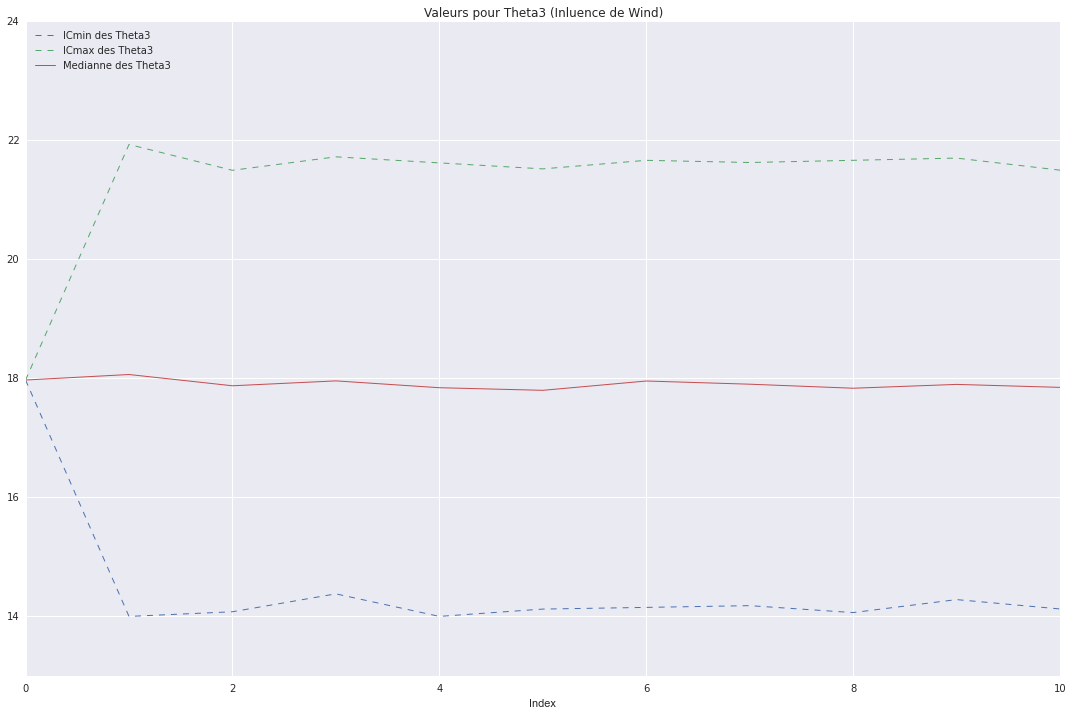

In [147]:
#pour avoir les graphiques matplotlib inclus dans le notebook et non affichés dans une fenetre exterieure
%matplotlib inline 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10))
plt.xlim(xmin=0, xmax=10)
plt.ylim(ymin=13, ymax=24)
xlabels = 'Index'
ylabels = ' '
plt.plot(IC_theta3.index.values, np.array(IC_theta3['ICmin']),'--',linewidth=1, label="ICmin des Theta3") 
plt.plot(IC_theta3.index.values, np.array(IC_theta3['ICmax']),'--',linewidth=1, label="ICmax des Theta3") 
plt.plot(IC_theta3.index.values, np.array(IC_theta3['Median']),linewidth=1, label="Medianne des Theta3") 
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Valeurs pour Theta3 (Inluence de Wind)')
plt.tight_layout()
plt.show()

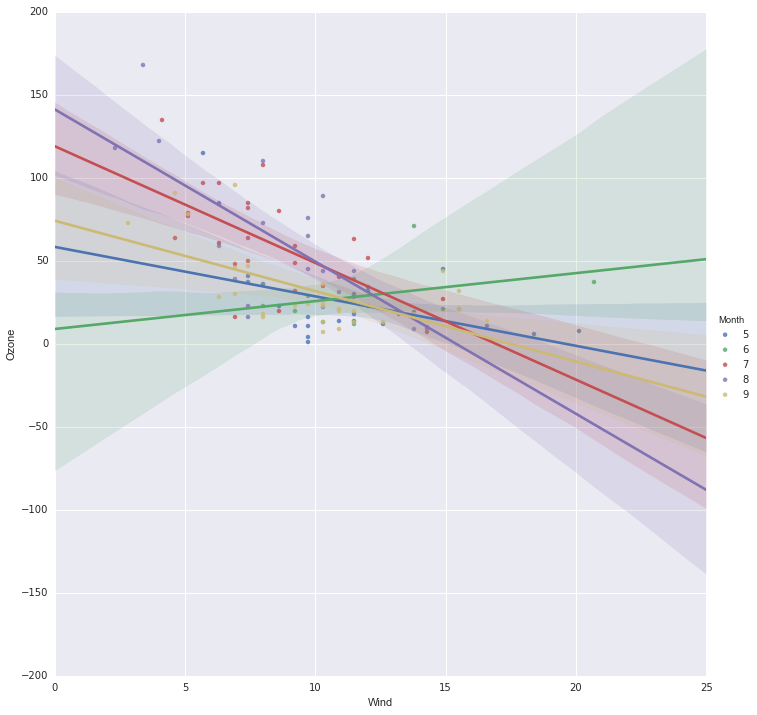

In [150]:
import seaborn as sns 
g = sns.lmplot(x="Wind", y="Ozone", hue="Month",size=10, data=dat)


Le mois de Juin (en vert) est atypique car la courbe est croissante. Il est possible que les données soient faussées.

#Algorithmes gloutons ou greedy